Gradient Boosting : 이진 트리의 오차를 보완 > Boosting

In [26]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
import seaborn as sns

In [27]:
cancer = load_breast_cancer()
x = cancer.data
y = cancer.target

In [28]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

In [29]:
model = GradientBoostingClassifier()

In [30]:
model.fit(x_train, y_train)

GradientBoostingClassifier()

In [31]:
model.score(x_test, y_test)

0.9649122807017544

In [32]:
params = {"n_estimators" : range(100, 300, 50), "max_depth" : [1, 2, 3, 4, 5], "learning_rate" : [0.0001, 0.001, 0.01, 0.1]}

In [33]:
model = GradientBoostingClassifier(random_state=1)

gscv_model = GridSearchCV(model, params, n_jobs=-1)
gscv_model.fit(x_train, y_train)

GridSearchCV(estimator=GradientBoostingClassifier(random_state=1), n_jobs=-1,
             param_grid={'learning_rate': [0.0001, 0.001, 0.01, 0.1],
                         'max_depth': [1, 2, 3, 4, 5],
                         'n_estimators': range(100, 300, 50)})

In [34]:
print(f"score : {gscv_model.score(x_test, y_test)}")
print(f"best params : {gscv_model.best_params_}")
print(f"best valid score: {gscv_model.best_score_}")
print(f"best model : {gscv_model.best_estimator_}")

score : 0.9473684210526315
best params : {'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 100}
best valid score: 0.9582417582417582
best model : GradientBoostingClassifier(max_depth=4, random_state=1)


<Axes: >

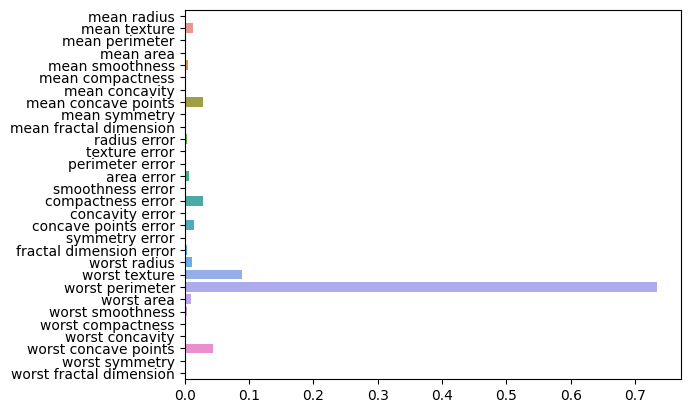

In [35]:
sns.barplot(x=gscv_model.best_estimator_.feature_importances_, y=cancer.feature_names)